In [1]:
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import matplotlib.pyplot as plt

import calendar

data_17_08 = pd.read_csv('../data/properati/properati-AR-2017-08-01-properties-sell.csv')
data_17_02 = pd.read_csv('../data/properati/properati-AR-2017-02-01-properties-sell.csv')
data_16_08 = pd.read_csv('../data/properati/properati-AR-2016-08-01-properties-sell.csv')
data_16_02 = pd.read_csv('../data/properati/properati-AR-2016-02-01-properties-sell.csv')
data_15_08 = pd.read_csv('../data/properati/properati-AR-2015-08-01-properties-sell.csv')
data_15_02 = pd.read_csv('../data/properati/properati-AR-2015-02-01-properties-sell.csv')
data_14_08 = pd.read_csv('../data/properati/properati-AR-2014-08-01-properties-sell.csv')
data_14_02 = pd.read_csv('../data/properati/properati-AR-2014-02-01-properties-sell.csv')
data_13_08 = pd.read_csv('../data/properati/properati-AR-2013-08-01-properties-sell.csv')

In [2]:
data1_frames = [data_17_08, data_17_02, data_16_08, data_16_02]
data1 = pd.concat(data1_frames)

In [3]:
# sacamos la columna id
data1 = data1.drop(['id'], axis=1)

In [4]:
data2_frames = [data_15_08, data_15_02, data_14_08, data_14_02, data_13_08]
data2 = pd.concat(data2_frames)

In [5]:
data_frames = [data1, data2]
data = pd.concat(data_frames)

In [114]:
data.head(3)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2012-09-19,USD,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...,NaN,...,1290.322581,360.36036,http://www.properati.com.ar/udh_venta_casa_mer...,house,NaN,Bs.As. G.B.A. Zona Oeste,93.0,NaN,333.0,CASA EN VENTA
1,Argentina,2012-10-22,USD,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...,NaN,...,1000.000000,1000.00000,http://www.properati.com.ar/20hi_venta_casa_me...,house,NaN,Bs.As. G.B.A. Zona Oeste,220.0,NaN,220.0,CASA EN VENTA
2,Argentina,2012-11-01,NaN,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,NaN,NaN,NaN,3430863.0,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...,-38.019951,...,NaN,NaN,http://www.properati.com.ar/336o_venta_departa...,apartment,2.0,Buenos Aires Costa Atlántica,42.0,NaN,NaN,DTO. 2 AMB. C/ VISTA PLENA AL MAR


In [7]:
#Cuantos lugares (o provincias) reflejan los avisos
data['state_name'].value_counts()

Capital Federal                 78606
Bs.As. G.B.A. Zona Norte        74991
Bs.As. G.B.A. Zona Oeste        42015
Buenos Aires Costa Atlántica    37457
Bs.As. G.B.A. Zona Sur          28232
Córdoba                         24663
Santa Fe                        21276
Buenos Aires Interior            9546
Mendoza                          1936
Río Negro                        1885
Misiones                         1714
Neuquén                          1683
Entre Ríos                       1626
Tucumán                          1133
San Luis                          762
Salta                             707
Corrientes                        693
La Pampa                          620
Chubut                            446
Catamarca                         334
Chaco                             173
San Juan                          138
Tierra Del Fuego                  134
Jujuy                              80
Santa Cruz                         69
Formosa                            66
La Rioja    

In [6]:
# Filtro por Capital Federal y GBA
data = data.loc[(data.state_name=='Capital Federal') | (data.state_name.str.contains('G.B.A'))]

In [7]:
# formato de fechas
data.created_on = pd.to_datetime(data.created_on, format='%Y/%m/%d')
data['year'] = data['created_on'].map(lambda x: x.year)
data['month'] = data.created_on.dt.month.apply(lambda x: calendar.month_name[x])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223844 entries, 0 to 31099
Data columns (total 30 columns):
country_name                  223844 non-null object
created_on                    223844 non-null datetime64[ns]
currency                      196925 non-null object
description                   223828 non-null object
expenses                      26167 non-null object
extra                         0 non-null object
floor                         23226 non-null float64
geonames_id                   175958 non-null float64
image_thumbnail               219321 non-null object
lat                           152193 non-null float64
lat-lon                       152193 non-null object
lon                           152193 non-null float64
operation                     223844 non-null object
place_name                    223790 non-null object
place_with_parent_names       223844 non-null object
price                         200409 non-null float64
price_aprox_local_currency    200409

In [15]:
data.isnull().sum()

country_name                       0
created_on                         0
currency                       26919
description                       16
expenses                      197677
extra                         223844
floor                         200618
geonames_id                    47886
image_thumbnail                 4523
lat                            71651
lat-lon                        71651
lon                            71651
operation                          0
place_name                        54
place_with_parent_names            0
price                          23435
price_aprox_local_currency     23435
price_aprox_usd                23435
price_per_m2                   49583
price_usd_per_m2               85765
properati_url                      0
property_type                      0
rooms                         115319
state_name                         0
surface_covered_in_m2          29197
surface_in_m2                 223844
surface_total_in_m2            62816
t

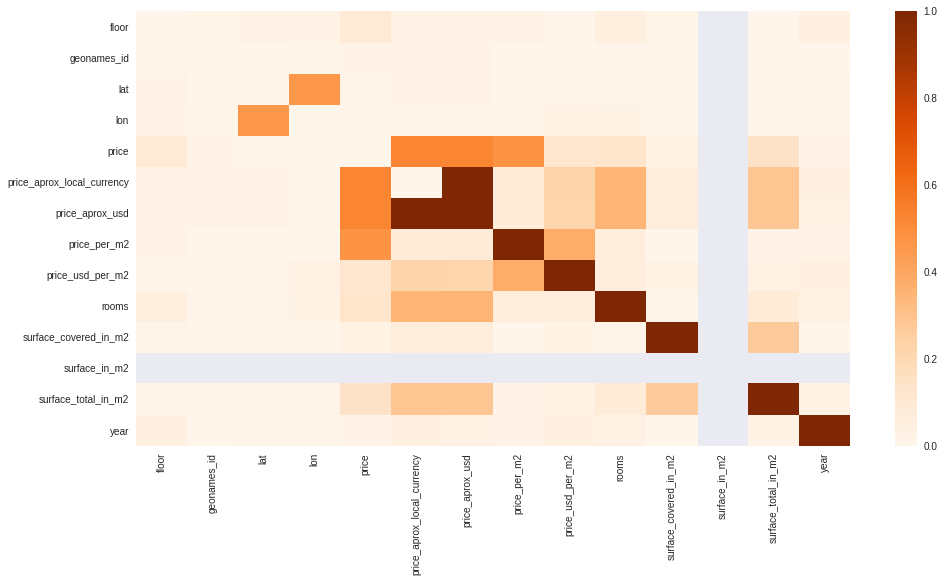

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
cor = data.corr().abs()
cor.values[[np.arange(6)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

In [184]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.997130e+05,164542.000000,164542.000000,1.995780e+05,1.995780e+05,1.995780e+05,161322.000000,1.964660e+05,131060.000000,1.688380e+05,20412.000000,120647.000000,2.458600e+04
mean,3.567993e+06,-34.656564,-59.257718,4.227614e+05,3.998520e+06,2.326915e+05,255.661137,1.031052e+04,2089.067534,6.221683e+03,16.556927,3.031911,5.173986e+03
std,3.734317e+05,2.071256,2.351986,1.689535e+06,6.346304e+06,3.681408e+05,2029.543670,4.512178e+06,2807.914666,2.527334e+04,123.435620,1.725182,1.294161e+05
min,3.427208e+06,-54.833014,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.077726,5.000000e-05,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.682001,-58.722767,1.000000e+05,1.495980e+06,8.600000e+04,49.000000,4.500000e+01,1113.486172,1.526611e+03,1.000000,2.000000,1.000000e+03
50%,3.433775e+06,-34.598708,-58.485090,1.785000e+05,2.452586e+06,1.400000e+05,85.000000,7.500000e+01,1735.849057,2.159091e+03,3.000000,3.000000,1.900000e+03
75%,3.832711e+06,-34.444479,-58.393658,3.890000e+05,4.487940e+06,2.600000e+05,215.000000,1.500000e+02,2405.405405,3.240741e+03,6.000000,4.000000,3.800000e+03
max,6.948895e+06,37.774929,3.379206,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,2.000000e+09,206333.333333,4.000000e+06,7071.000000,40.000000,1.000150e+07


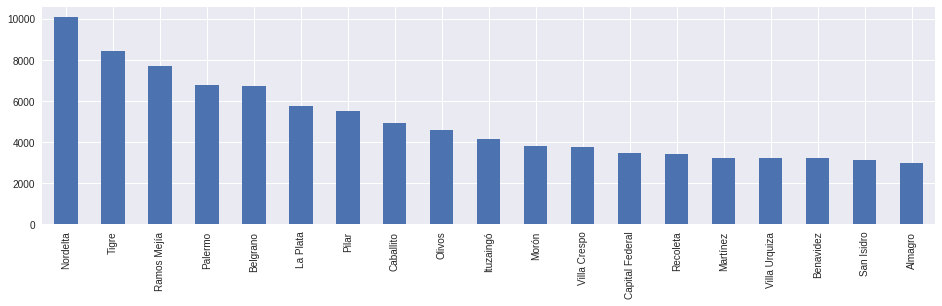

In [14]:
# top 20 lugares con mas ventas

data['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,4));

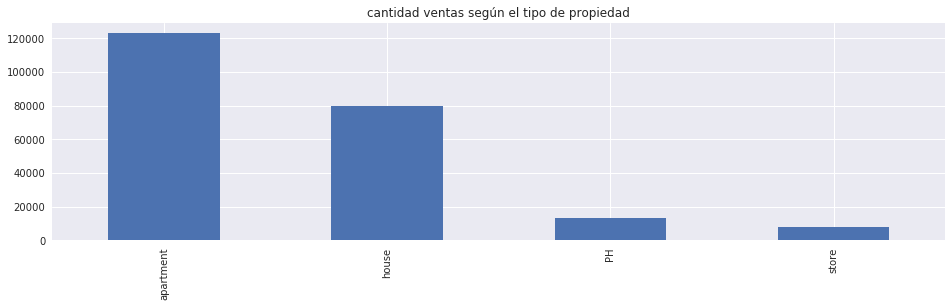

In [50]:
# cantidad de ventas según el tipo de propiedad

data['property_type'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="cantidad ventas según el tipo de propiedad");

# cantidad de publicaciones por año según el tipo de propiedad

In [65]:
apartment_year = data.loc[data.property_type == 'apartment',['year']]
house_year = data.loc[data.property_type == 'house',['year']]
ph_year = data.loc[data.property_type == 'PH',['year']]
store_year = data.loc[data.property_type == 'store',['year']]

In [66]:
data_apartment = apartment_year['year'].value_counts().sort_index()
data_house = house_year['year'].value_counts().sort_index()
data_ph = ph_year['year'].value_counts().sort_index()
data_store = store_year['year'].value_counts().sort_index()

data_apartment.rename('Apartment', inplace=True)
data_house.rename('House', inplace=True)
data_ph.rename('PH', inplace=True)
data_store.rename('Store', inplace=True)

data_by_year = pd.concat([data_apartment,data_house, data_ph, data_store], axis=1)
print('datos por año\n',df_by_year)

datos por año
       Apartment  House      PH   Store
2012        NaN      3     NaN     NaN
2013      193.0    181    34.0     9.0
2014     1768.0   2011   351.0   218.0
2015    12654.0   8938  1739.0   792.0
2016    49581.0  34067  5617.0  3300.0
2017    58816.0  34570  5551.0  3451.0


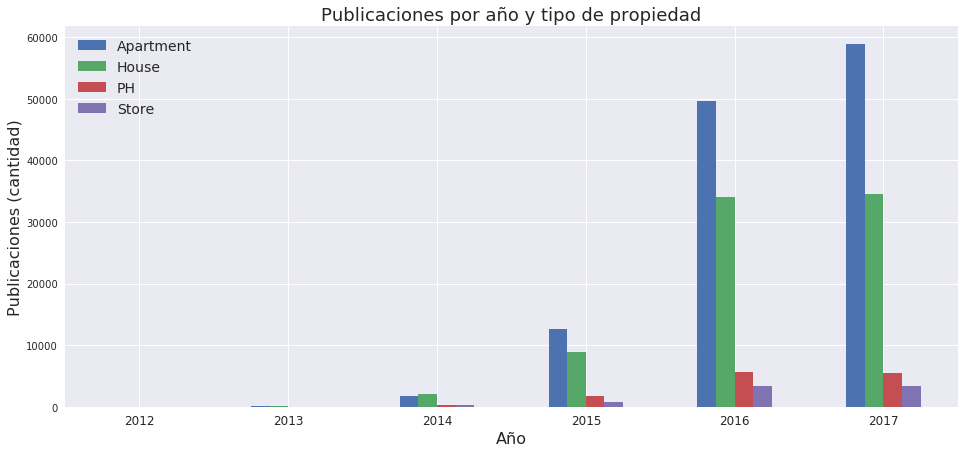

In [67]:
year = ['2012','2013','2014','2015','2016','2017']
ax2 = df_by_year.plot(kind='bar', figsize=(16,7))
ax2.set_title('Publicaciones por año y tipo de propiedad', fontsize=18)
ax2.set_xlabel('Año', fontsize=16)
ax2.set_ylabel('Publicaciones (cantidad)', fontsize=16)
ax2.set_xticklabels(year,rotation='horizontal', fontsize=12)
ax2.legend(prop={'size':14});

In [23]:
data.month.value_counts()

July         55556
February     23091
June         17420
August       16919
January      16417
November     15493
May          14670
December     14127
April        14114
October      13316
March        13312
September     9409
Name: month, dtype: int64

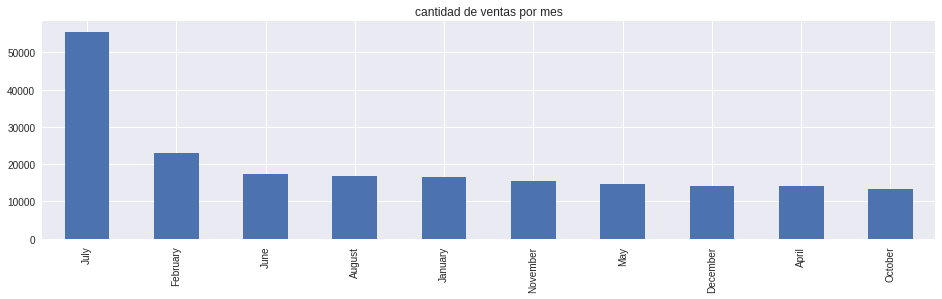

In [17]:
data.month.value_counts()[0:10].plot(kind='bar',figsize=(16,4), title="cantidad de ventas por mes");

In [40]:
# Heatmap - top 30 lugares con mas ventas por mes

grouped = data[['place_name', 'month']].groupby(['place_name','month'])['month'].agg(['count'])
grouped_by_month = grouped.loc[grouped['count'] > 0,:].sort_values('count', ascending=False).head(30)
grouped_by_month = grouped_by_month.reset_index()

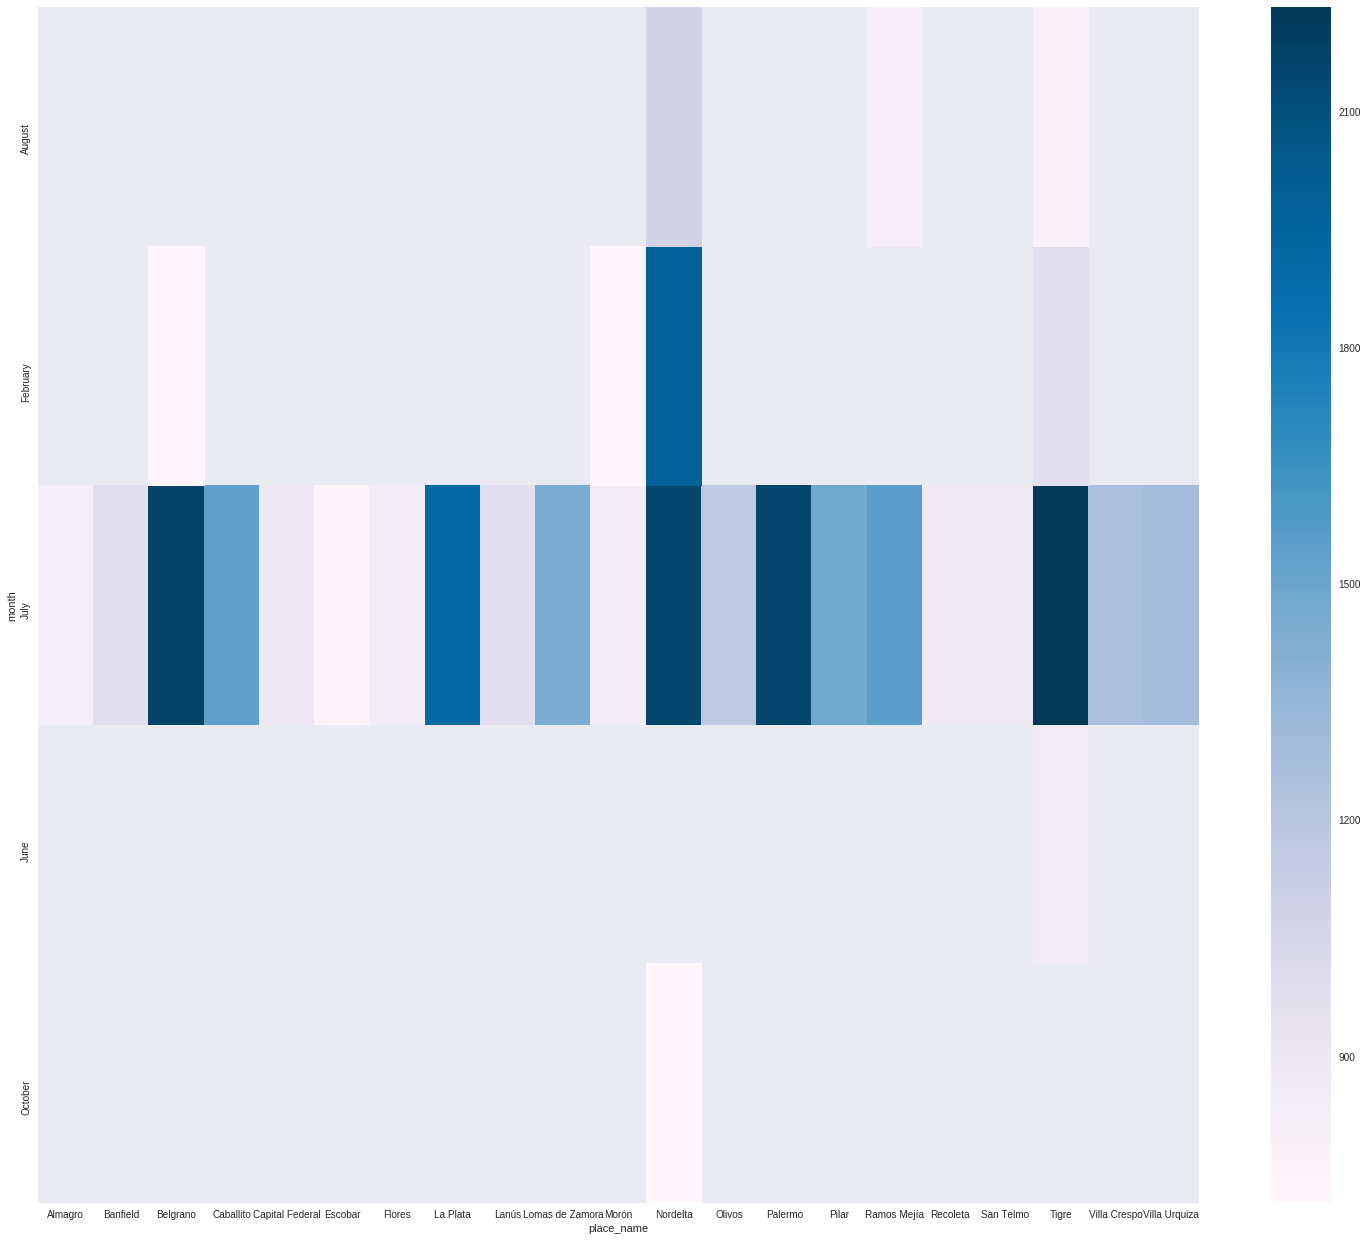

In [41]:
import seaborn as sns

grouped_by_month = pd.pivot_table(grouped_by_month, values='count', columns='place_name', index='month')
fig, ax = plt.subplots(figsize=(26,22))
sns.heatmap(grouped_by_month,cmap='PuBu');

# ¿En qué año y qué tipo de propiedad se registró la mayor cantidad de avisos?

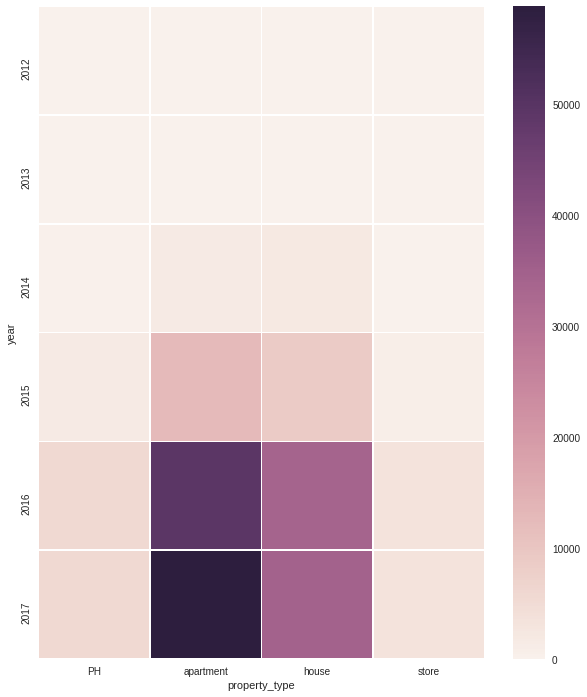

In [43]:
# cantidad de ventas año y tipo de propiedad

data_grouped = data.groupby(['year','property_type']).size().reset_index()
data_grouped.columns=['year','property_type','size']
data_grouped = data_grouped.pivot(index='year', columns='property_type',values='size')
data_grouped.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize=(10,12))
sns.heatmap(data_grouped, annot=False, linewidths=.5, ax=ax);

# ¿ qué tipo de departamentos son los publicados ese año?

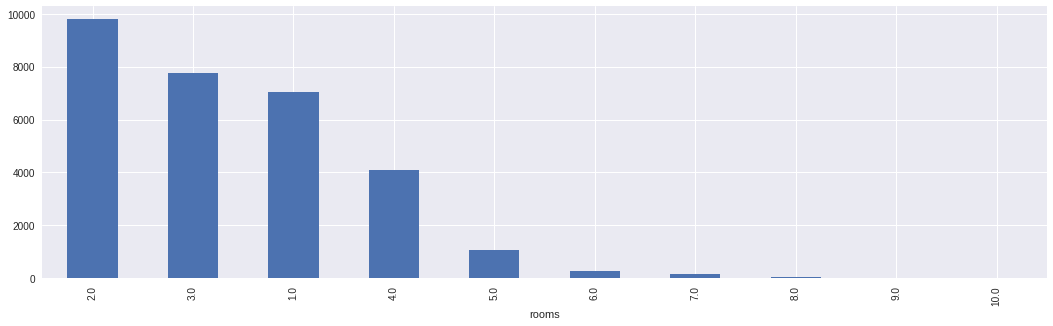

In [85]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms > 0)]
grouped = filtered[['rooms','price_usd_per_m2']].groupby('rooms').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','size')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5));

# para los departamentos de 1, 2 y 3 habitaciones ¿cómo influye el piso en el precio de la propiedad ?

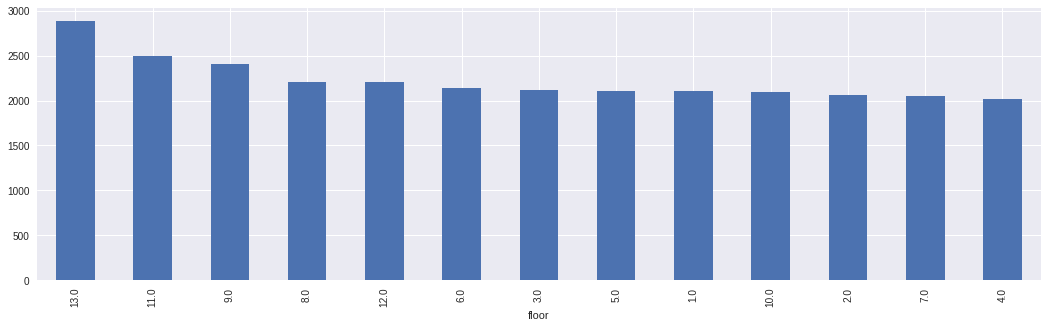

In [100]:
# rooms == 2, parece que no muestra nada interesante 

filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms == 2)]

grouped = filtered[['floor','price_usd_per_m2']].groupby('floor').agg([np.size, np.mean])

grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','mean')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5));

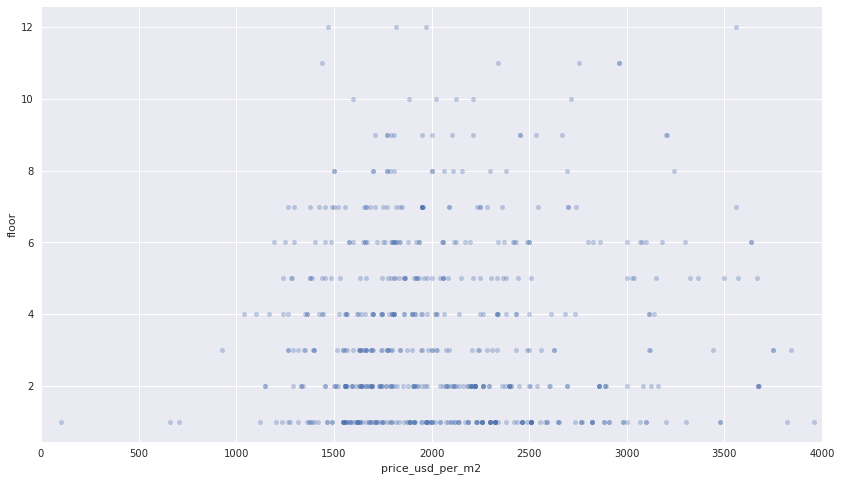

In [93]:
data_apart_floor = data[(data.year == 2017) & (data.property_type == 'apartment') & (data.floor < 13) &(data.rooms == 2)]

ax = plt.subplot(111)
data_apart_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(14,8),ax=ax);
ax.set_xlim(0,4000);

# ¿Cuáles son los principales lugares donde se registraron estas ventas?

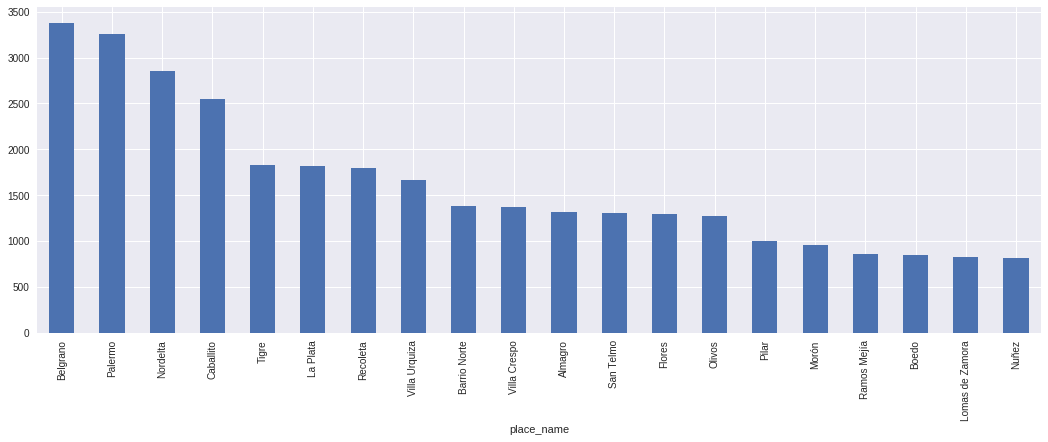

In [58]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]
grouped = filtered.groupby(['place_name']).agg(['count'])

grouped = filtered[['place_name','price_usd_per_m2']].groupby('place_name').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,6));

# ¿ qué porcentaje de las ventas representa Capital Federal y G.B.A. ?

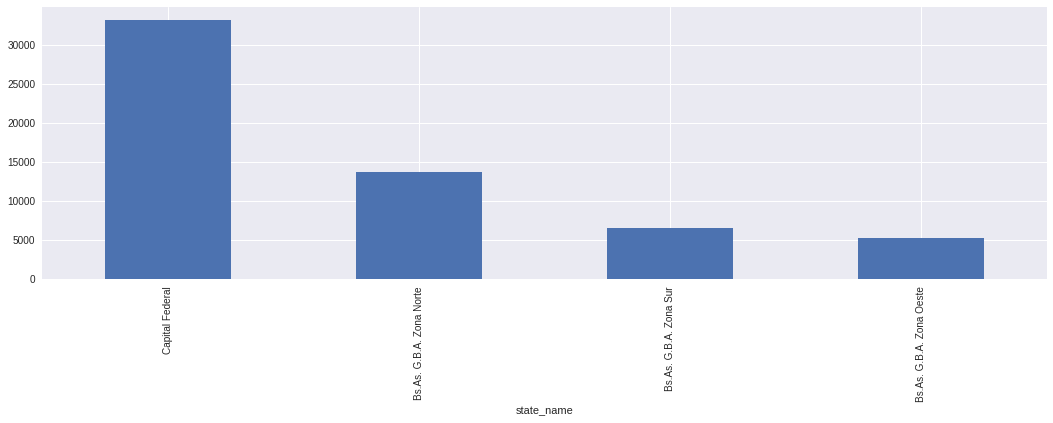

In [70]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]

grouped = filtered[['state_name','price_usd_per_m2']].groupby('state_name').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,5));

# publicaciones de Capital Federal por tipo de propiedad durante los años

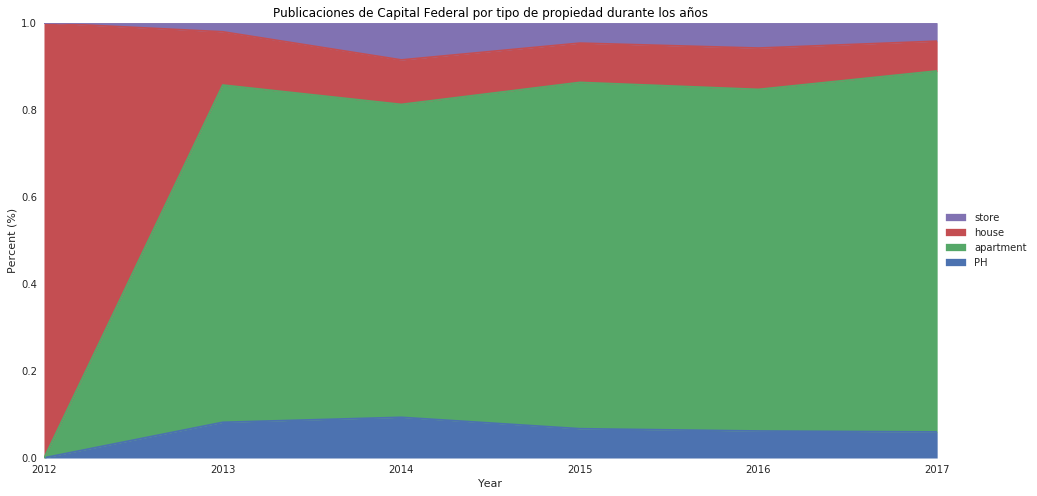

In [95]:
caba_year = pd.DataFrame(data.loc[data.state_name == 'Capital Federal'].groupby(['property_type','year']).size())
caba_year.columns = ['num']

caba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(caba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de Capital Federal por tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

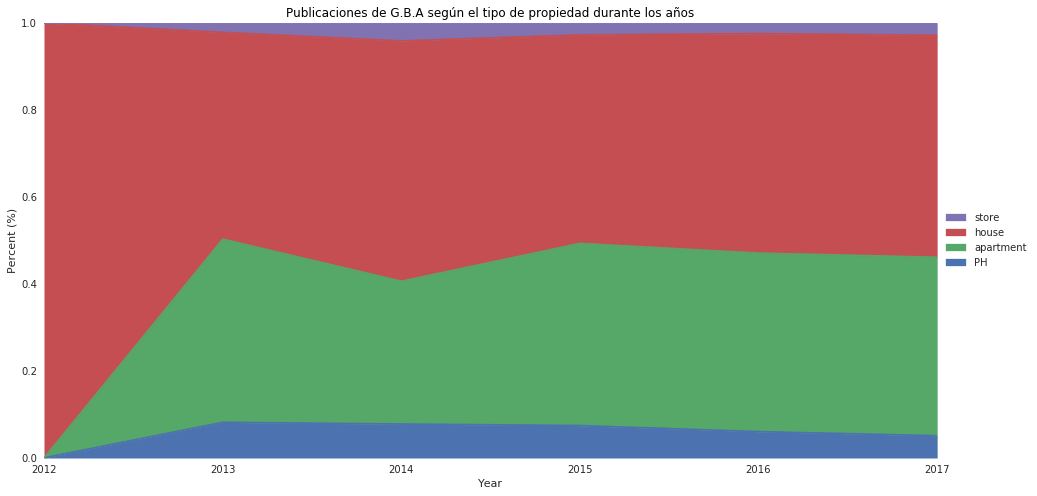

In [60]:
gba_year = pd.DataFrame(data.loc[data.state_name.str.contains('G.B.A')].groupby(['property_type','year']).size())
gba_year.columns = ['num']

gba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(gba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de G.B.A según el tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

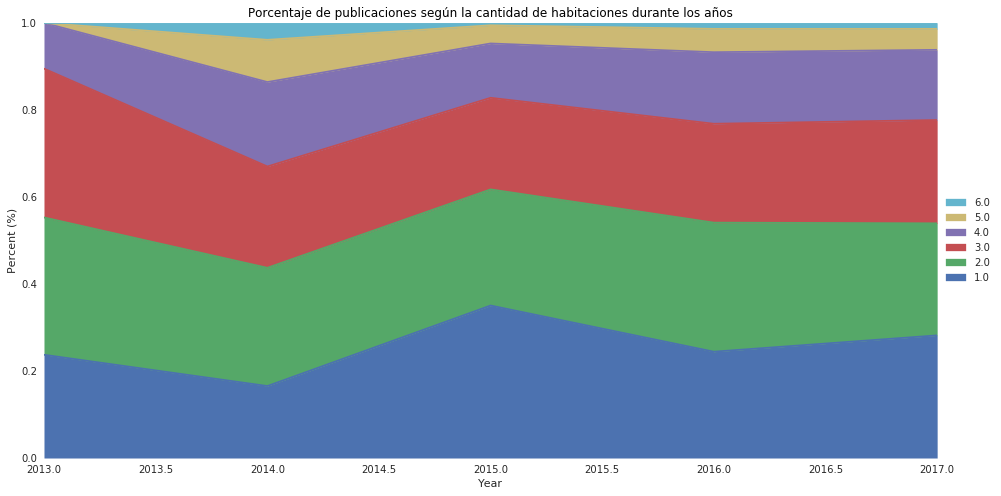

In [61]:
gy = pd.DataFrame(data.loc[(data.state_name == 'Capital Federal') & (data.property_type=='apartment')\
                          & (data.rooms < 7)].groupby(['rooms','year']).size())
gy.columns = ['num']

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='rooms', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Porcentaje de publicaciones según el número de ambientes durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

In [97]:
data_depto = data[data.property_type == 'apartment']

In [98]:
data_depto = data_depto[data_depto.rooms < 7]

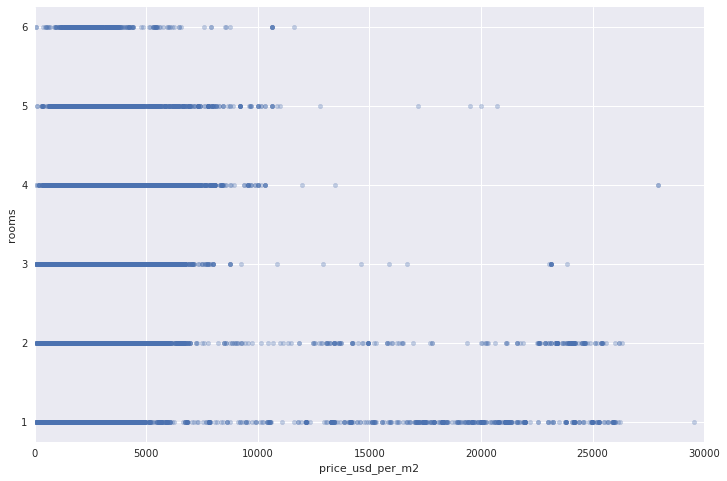

In [103]:
ax = plt.subplot(111)
data_depto.plot.scatter('price_usd_per_m2','rooms',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,30000);

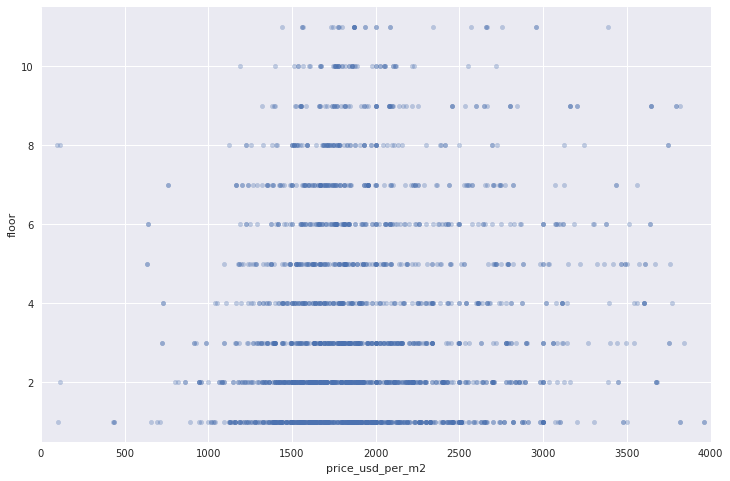

In [92]:
apartment_floor = data.loc[(data.property_type == 'apartment') & (data.rooms == 2), ['price_usd_per_m2','floor']]

ax = plt.subplot(111)
apartment_floor = apartment_floor.loc[(apartment_floor.floor < 12)]
apartment_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,4000);